In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

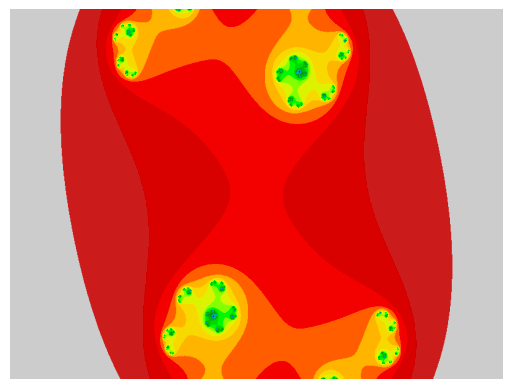

Execution time: 0.24010629765689373 seconds


In [ ]:
"""
This solution is an improved version of an efficient Julia set solver
from:
'Bauckhage C. NumPy/SciPy Recipes for Image Processing:
 Creating Fractal Images. researchgate. net, Feb. 2015.'
"""
import matplotlib.pyplot as plt
import numpy as np
import itertools

from functools import partial
from numbers import Complex
from typing import Callable

def douady_hubbard_polynomial(z: Complex,
                              *,
                              c: Complex):
    """
    Monic and centered quadratic complex polynomial
    https://en.wikipedia.org/wiki/Complex_quadratic_polynomial#Map
    """
    return z ** 2 + c


def julia_set(*,
              mapping: Callable[[Complex], Complex],
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:

    imaginary_axis, real_axis = np.ogrid[
                        min_coordinate.imag: max_coordinate.imag: height * 1j,
                        min_coordinate.real: max_coordinate.real: width * 1j]
    complex_plane = real_axis + 1j * imaginary_axis

    result = np.ones(complex_plane.shape)

    for _ in range(iterations_count):
        mask = np.abs(complex_plane) <= threshold
        if not mask.any():
            break
        complex_plane[mask] = mapping(complex_plane[mask])
        result[~mask] += 1

    return result


if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial,
                      c= 0.6309	 + 0.314156j)  # type: Callable[[Complex], Complex]

    image = julia_set(mapping=mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600)
    plt.axis('off')
    plt.imshow(image,
               cmap='nipy_spectral',
               origin='lower')
    plt.show()
    
import timeit

mapping = partial(douady_hubbard_polynomial, 
                      c= 0.6309	+ 0.314156j)

execution_time = timeit.timeit(lambda: julia_set(mapping=mapping,
                      min_coordinate=-1.5 - 1.5j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600), number=1)

print(f"Execution time: {execution_time} seconds")


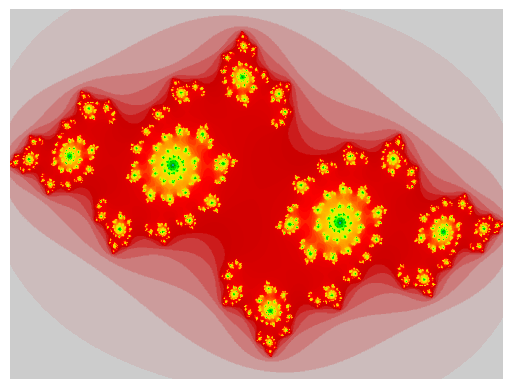

Execution time: 1.4617238845676184 seconds


In [11]:
"""
This solution is an improved version of an efficient Julia set solver
from:
'Bauckhage C. NumPy/SciPy Recipes for Image Processing:
 Creating Fractal Images. researchgate. net, Feb. 2015.'
"""
import itertools
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np


def douady_hubbard_polynomial(z: Complex,
                              *,
                              c: Complex):
    """
    Monic and centered quadratic complex polynomial
    https://en.wikipedia.org/wiki/Complex_quadratic_polynomial#Map
    """
    return z ** 2 + c

def julia_set(*,
              mapping: Callable[[np.complex128], np.complex128],
              min_coordinate: np.complex128,
              max_coordinate: np.complex128,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:
    """
    As described in https://en.wikipedia.org/wiki/Julia_set
    :param mapping: function defining Julia set
    :param min_coordinate: bottom-left complex plane coordinate
    :param max_coordinate: upper-right complex plane coordinate
    :param height: pixels in vertical axis
    :param width: pixels in horizontal axis
    :param iterations_count: number of iterations
    :param threshold: if the magnitude of z becomes greater
    than the threshold we assume that it will diverge to infinity
    :return: 2D pixels array of intensities
    """
    imaginary_axis, real_axis = np.ogrid[
                        min_coordinate.imag: max_coordinate.imag: height * 1j,
                        min_coordinate.real: max_coordinate.real: width * 1j]
    complex_plane = real_axis + 1j * imaginary_axis

    result = np.ones(complex_plane.shape, dtype=np.uint8)

    for _ in range(iterations_count):
        mask = np.less_equal(np.abs(complex_plane), threshold)
        if not np.any(mask):
            break
        complex_plane = np.where(mask, mapping(complex_plane), complex_plane)
        result[~mask] += 1

    return result

if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial,
                      c=-0.74543 + 0.314156j)  # type: Callable[[Complex], Complex]

    image = julia_set(mapping=mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600)
    plt.axis('off')
    plt.imshow(image,
               cmap='nipy_spectral',
               origin='lower')
    plt.show()
    
import timeit

mapping = partial(douady_hubbard_polynomial,
                      c=-0.74543 + 0.314156j)

execution_time = timeit.timeit(lambda: julia_set(mapping=mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600), number=1)

print(f"Execution time: {execution_time} seconds")

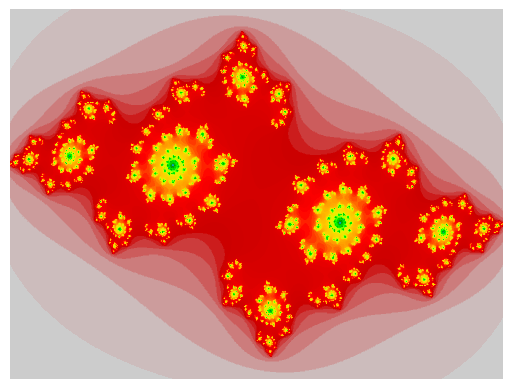

Execution time: 0.15552549436688423 seconds


In [12]:
"""
FASTEST Solution from:
https://codereview.stackexchange.com/questions/210271/generating-julia-set
"""
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np


def douady_hubbard_polynomial(z: Complex,
                              c: Complex) -> Complex:
    """
    Monic and centered quadratic complex polynomial
    https://en.wikipedia.org/wiki/Complex_quadratic_polynomial#Map
    """
    return z ** 2 + c


def julia_set(mapping: Callable[[Complex], Complex],
              *,
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:
    """
    As described in https://en.wikipedia.org/wiki/Julia_set
    :param mapping: function defining Julia set
    :param min_coordinate: bottom-left complex plane coordinate
    :param max_coordinate: upper-right complex plane coordinate
    :param height: pixels in vertical axis
    :param width: pixels in horizontal axis
    :param iterations_count: number of iterations
    :param threshold: if the magnitude of z becomes greater
    than the threshold we assume that it will diverge to infinity
    :return: 2D pixels array of intensities
    """
    im, re = np.ogrid[min_coordinate.imag: max_coordinate.imag: height * 1j,
                      min_coordinate.real: max_coordinate.real: width * 1j]
    z = (re + 1j * im).flatten()

    live, = np.indices(z.shape)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = abs(z_live) > threshold
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count

    return iterations.reshape((height, width))


if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial,
                      c=-0.74543 + 0.314156j)  # type: Callable[[Complex], Complex]

    image = julia_set(mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600)
    plt.axis('off')
    plt.imshow(image,
               cmap='nipy_spectral_r',
               origin='lower')
    plt.show()
    
    
   
import timeit

mapping = partial(douady_hubbard_polynomial,
                      c=-0.74543 + 0.314156j)

execution_time = timeit.timeit(lambda: julia_set(mapping=mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600), number=1)

print(f"Execution time: {execution_time} seconds")

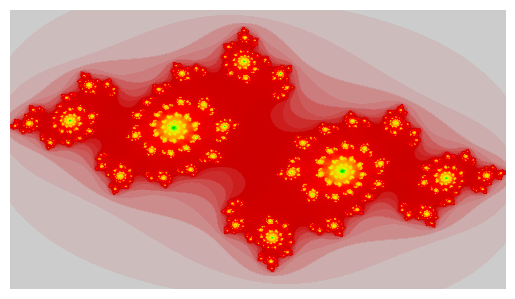

In [13]:
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np


def douady_hubbard_polynomial(z: Complex,
                              c: Complex) -> Complex:
    return z ** 2 + c


def julia_set(mapping: Callable[[Complex], Complex],
              *,
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:

    im, re = np.ogrid[min_coordinate.imag: max_coordinate.imag: height * 1j,
             min_coordinate.real: max_coordinate.real: width * 1j]
    z = (re + 1j * im).flatten()

    live, = np.indices(z.shape)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = threshold < abs(z_live)
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count

    return iterations.reshape((height, width))


if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial,
                      c=-0.74543 + 0.314156j)  # type: Callable[[Complex], Complex]

    image = julia_set(mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=1920,
                      height=1080)
    plt.axis('off')
    plt.imshow(image,
               cmap='nipy_spectral_r',
               origin='lower')
    plt.show()


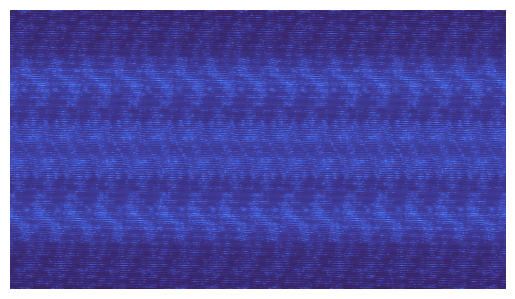

In [1]:
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np


def douady_hubbard_polynomial(z: Complex, c: Complex) -> Complex:
    return z ** 2 + c


def julia_set(mapping: Callable[[Complex], Complex],
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 500,
              threshold: float = 2.) -> np.ndarray:

    im,  re= np.ogrid[min_coordinate.real:max_coordinate.real:width * 1j,
                      min_coordinate.imag:max_coordinate.imag:height * 1j]
    z = (im + 1j * re).flatten()

    live = np.arange(z.size)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = threshold < np.abs(z_live)
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count

    return iterations.reshape((height, width))


def plot_julia_set(image: np.ndarray, cmap: str = 'nipy_spectral_r') -> None:
    plt.axis('off')
    plt.imshow(image, cmap=cmap, origin='lower')
    plt.show()


if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial, c=-0.74543 + 0.314156j)

    image = julia_set(mapping,
                      min_coordinate=-1 - 1j,
                      max_coordinate=1 + 1j,
                      width=1920,
                      height=1080)
    
    plot_julia_set(image, cmap='turbo')

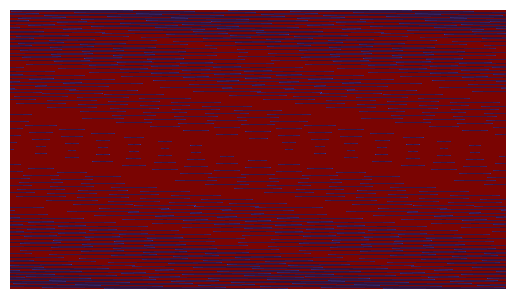

In [28]:
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np


def douady_hubbard_polynomial(z: Complex,
                              c: Complex) -> Complex:
    return z ** 2 + c


def julia_set(mapping: Callable[[Complex], Complex],
              *,
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:

    re, im = np.ogrid[min_coordinate.real: max_coordinate.real: width * 1j,
                      min_coordinate.imag: max_coordinate.imag: height * 1j]
    z = (re + 1j * im).flatten()

    live, = np.indices(z.shape)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = threshold < abs(z_live)
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count

    return iterations.reshape((height, width))


def plot_julia_set(image: np.ndarray, cmap: str = 'nipy_spectral_r') -> None:
    plt.axis('off')
    plt.imshow(image, cmap=cmap, origin='lower', interpolation='nearest')
    plt.show()


if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial,
                      c=-0.285 + 0.01)  # type: Callable[[Complex], Complex]

    image = julia_set(mapping,
                      min_coordinate=-1 - 1j,
                      max_coordinate=1 + 1j,
                      width=1920 * 2,
                      height=1080 * 2)
    
    plot_julia_set(image, cmap='turbo')

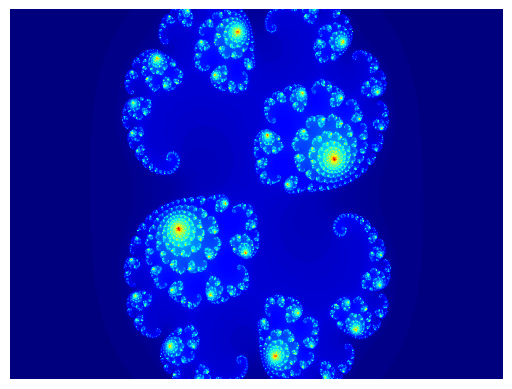

Execution time: 0.6828448232263327 seconds


In [30]:
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np


def douady_hubbard_polynomial(z: Complex,
                              c: Complex) -> Complex:
    """
    Monic and centered quadratic complex polynomial
    https://en.wikipedia.org/wiki/Complex_quadratic_polynomial#Map
    """
    return z ** 2 + c


def julia_set(mapping: Callable[[Complex], Complex],
              *,
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:
    """
    As described in https://en.wikipedia.org/wiki/Julia_set
    :param mapping: function defining Julia set
    :param min_coordinate: bottom-left complex plane coordinate
    :param max_coordinate: upper-right complex plane coordinate
    :param height: pixels in vertical axis
    :param width: pixels in horizontal axis
    :param iterations_count: number of iterations
    :param threshold: if the magnitude of z becomes greater
    than the threshold we assume that it will diverge to infinity
    :return: 2D pixels array of intensities
    """
    im, re = np.ogrid[min_coordinate.imag: max_coordinate.imag: height * 1j,
                      min_coordinate.real: max_coordinate.real: width * 1j]
    z = (re + 1j * im).flatten()

    live, = np.indices(z.shape)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = abs(z_live) > threshold
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count

    return iterations.reshape((height, width))


if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial,
                      c=0.285 + 0.01j)  # type: Callable[[Complex], Complex]

    image = julia_set(mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600)
    plt.axis('off')
    plt.imshow(image,
               cmap='jet',
               origin='lower')
    plt.show()
    

import timeit

mapping = partial(douady_hubbard_polynomial,
                      c=-0.7 + 0.27015j)

execution_time = timeit.timeit(lambda: julia_set(mapping=mapping,
                      min_coordinate=-1.5 - 1j,
                      max_coordinate=1.5 + 1j,
                      width=800,
                      height=600), number=1)

print(f"Execution time: {execution_time} seconds")

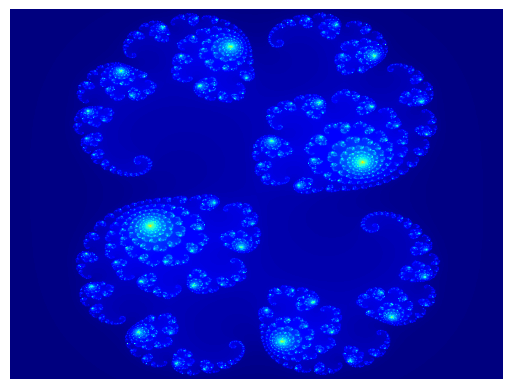

In [1]:
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np

def douady_hubbard_polynomial(z: Complex, 
                              c: Complex) -> Complex:
    return z ** 2 + c

def julia_set(mapping: Callable[[Complex], Complex],
              *,
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 500,
              threshold: float = 2.) -> np.ndarray:
    im, re = np.ogrid[min_coordinate.imag: max_coordinate.imag: height * 1j,
                      min_coordinate.real: max_coordinate.real: width * 1j]
    z = (re + 1j * im).flatten()

    live, = np.indices(z.shape)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = abs(z_live) > threshold
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count

    return iterations.reshape((height, width))

if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial,
                      c=0.285 + 0.01j)  # type: Callable[[Complex], Complex]
    image = julia_set(mapping,
                      min_coordinate=-1.1 - 1.1j,
                      max_coordinate=1.1 + 1.1j,
                      width=800,
                      height=600)
    plt.axis('off')
    plt.imshow(image,
               cmap='jet',
               origin='lower')
    plt.show()

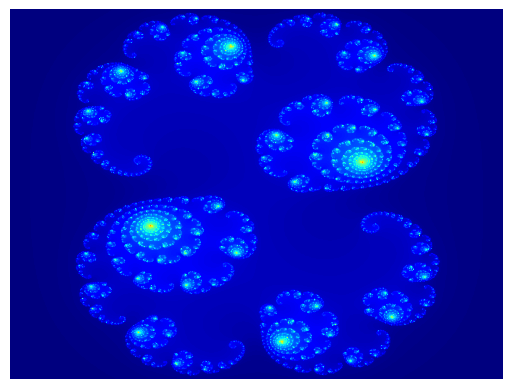

In [58]:
from functools import partial
from numbers import Complex
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np

def douady_hubbard_polynomial(z: Complex, c: Complex) -> Complex:
    return z ** 2 + c

def julia_set(mapping: Callable[[Complex], Complex],
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 15000,
              threshold: float = 2.) -> np.ndarray:
    im, re = np.mgrid[min_coordinate.imag:max_coordinate.imag:height*1j,
                      min_coordinate.real:max_coordinate.real:width*1j]
    z = (re + 1j * im).flatten()

    live = np.arange(z.size)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live]
        z[live] = mapping(z_live)
        escaped = np.abs(z_live) > threshold
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count

    return iterations.reshape((height, width))

if __name__ == '__main__':
    mapping = partial(douady_hubbard_polynomial, c=0.28554654 + 0.01j)
    image = julia_set(mapping,
                      min_coordinate=-1.1 - 1.1j,
                      max_coordinate=1.1 + 1.1j,
                      width=800,
                      height=600)

    plt.axis('off')
    plt.imshow(image, cmap='jet', origin='lower')
    plt.show()


In [6]:
!pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)

[notice] A new release of pip available: 23.1.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


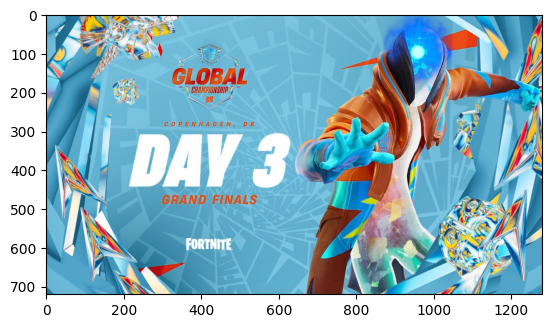

In [118]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
img = cv2.imread('./maxresdefault.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(gray, 25000000, 1500000)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the image
for contour in contours:
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], linewidth= 0.161803398874989484)

# Show the image with the contours
plt.imshow(img)
plt.show()



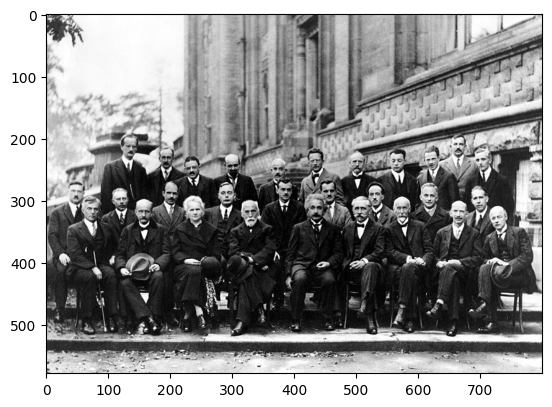

In [103]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
img = cv2.imread('./Solvay_conference_1927.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(gray, 25000000, 1500000)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the image
for contour in contours:
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], linewidth=0.729735256286)

# Show the image with the contours
plt.imshow(img)
plt.show()


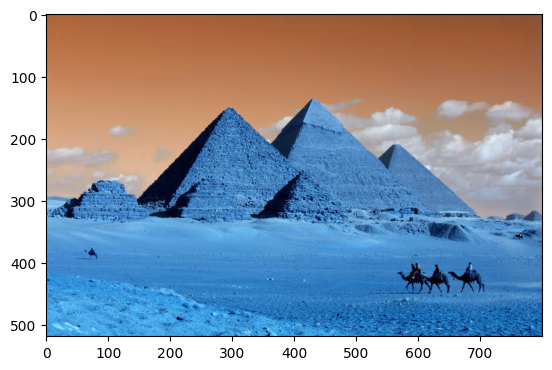

In [114]:
import matplotlib.pyplot as plt

# Read the image using OpenCV
img = cv2.imread('./piramide.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the gradient magnitude
# Convert the edges image to type uint8
edges = cv2.convertScaleAbs(edges)


# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the image
for contour in contours:
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], linewidth=2)

# Show the image with the contours
plt.imshow(img)
plt.show()